In [197]:
# Import necessary libraries for the task.
import torch  # Import PyTorch for deep learning.
import torch.nn as nn  # Import the neural network module from PyTorch.
import numpy as np  # Import NumPy for numerical operations.


In [198]:
# Load the Iris dataset using Seaborn.
import seaborn as sns
iris_data = sns.load_dataset('iris')

# Display the data structure
print(iris_data.head())

# Convert the dataset from a pandas dataframe to a PyTorch tensor.
data = torch.tensor(iris_data[iris_data.columns[0:4]].values).float()

# Transform the species labels into numerical values.
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris_data.species == 'versicolor'] = 1
labels[iris_data.species == 'virginica'] = 2


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [199]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Separate data into train and test

In [200]:
# Set the proportion of data for training (e.g., 80% for training).
training_proportion = 0.8

# Unstratified Split
# Calculate the number of training examples based on the proportion.
num_training = int(len(labels) * training_proportion)

# Initialize a boolean vector to select data and labels for training.
train_test_bool = np.zeros(len(labels), dtype=bool)

# Randomly select samples for training.
train_indices = np.random.choice(range(len(labels)), num_training, replace=False)
train_test_bool[train_indices] = True


In [201]:
# Stratified Shuffle Split
# from sklearn.model_selection import StratifiedShuffleSplit

# # Use StratifiedShuffleSplit to perform stratified sampling
# sss = StratifiedShuffleSplit(n_splits=1, test_size=1-training_proportion, random_state=42)

# # Get the indices for train and test sets
# for train_index, test_index in sss.split(data, labels):
#     train_test_bool = np.zeros(len(labels), dtype=bool)
#     train_test_bool[train_index] = True


In [202]:
train_test_bool

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

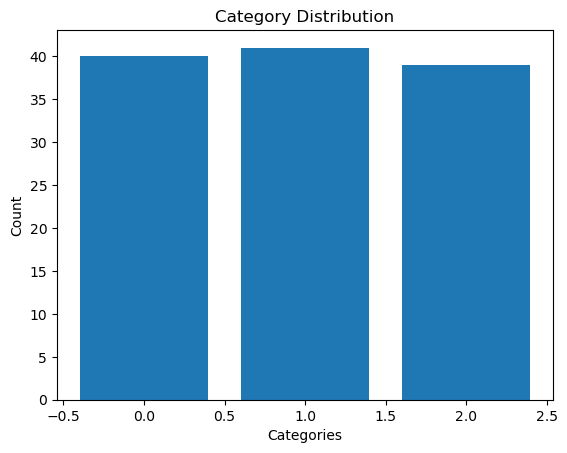

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# Get the unique labels and their counts
unique_labels, counts = torch.unique(labels[train_test_bool], return_counts=True)

# Convert to numpy for easier use with matplotlib (optional)
unique_labels = unique_labels.numpy()
counts = counts.numpy()

# Plotting
plt.bar(unique_labels, counts)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

In [204]:
# Check the balance of species labels in the dataset.
print('Average of full dataset:')
print(torch.mean(labels.float()))  # Should be 1 by definition
print(' ')

print('Average of training dataset:')
print(torch.mean(labels[train_test_bool].float()))  # Should also be 1
print(' ')

print('Average of testing dataset:')
print(torch.mean(labels[~train_test_bool].float()))  # Should also be 1

# Not straitfied sampling!

Average of full dataset:
tensor(1.)
 
Average of training dataset:
tensor(0.9917)
 
Average of testing dataset:
tensor(1.0333)


In [205]:
# Define the architecture of the artificial neural network (ANN) model.
custom_ann_model = nn.Sequential(
    nn.Linear(4, 64),   # Input layer
    nn.ReLU(),          # ReLU activation
    nn.Linear(64, 64),  # Hidden layer
    nn.ReLU(),          # ReLU activation
    nn.Linear(64, 3)    # Output layer
)

# Define the loss function (Cross-Entropy Loss).
loss_function = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent).
optimizer = torch.optim.SGD(custom_ann_model.parameters(), lr=0.01)


In [206]:
# Print the shapes of the entire dataset, training set, and test set.
print('Shape of the entire dataset:')
print(data.shape)

print('Shape of the training set:')
print(data[train_test_bool, :].shape)

print('Shape of the test set:')
print(data[~train_test_bool, :].shape)


Shape of the entire dataset:
torch.Size([150, 4])
Shape of the training set:
torch.Size([120, 4])
Shape of the test set:
torch.Size([30, 4])


# Train and test the model

In [207]:
# Set the number of training epochs.
num_epochs = 1000

# Initialize losses and ongoing accuracy.
losses = torch.zeros(num_epochs)
ongoing_accuracy = []

# Loop over epochs for training.
for epoch_idx in range(num_epochs):

    # Forward pass through the model using the training data.
    predictions = custom_ann_model(data[train_test_bool, :])

    # Compute accuracy for the current epoch.
    epoch_accuracy = 100 * torch.mean(
        (torch.argmax(predictions, axis=1) == labels[train_test_bool]).float())
    ongoing_accuracy.append(epoch_accuracy)

    # Compute the Cross-Entropy loss.
    loss = loss_function(predictions, labels[train_test_bool])
    losses[epoch_idx] = loss

    # Backpropagation.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [208]:
# Final forward pass using the training data.
train_predictions = custom_ann_model(data[train_test_bool, :])
training_accuracy = 100 * torch.mean(
    (torch.argmax(train_predictions, axis=1) == labels[train_test_bool]).float())

# Final forward pass using the test data.
test_predictions = custom_ann_model(data[~train_test_bool, :])
testing_accuracy = 100 * torch.mean(
    (torch.argmax(test_predictions, axis=1) == labels[~train_test_bool]).float())


In [209]:
# Report the final training and testing accuracies.
print('Final TRAIN accuracy: %g%%' % training_accuracy)
print('Final TEST accuracy:  %g%%' % testing_accuracy)


Final TRAIN accuracy: 97.5%
Final TEST accuracy:  100%


In [210]:
# normally also inspect losses and accuracy by epoch, etc etc etc.

In [211]:
# Get the predicted labels
predicted_labels = torch.argmax(test_predictions, axis=1)

# Get the true labels for the test set
test_labels = labels[~train_test_bool]

# Calculate accuracy for each category
categories = [0, 1, 2]  # Corresponding to setosa, versicolor, virginica
category_accuracies = {}

for category in categories:
    # Find indices where true labels are the current category
    category_indices = (test_labels == category).nonzero().squeeze()
    
    # Count correct predictions for this category
    correct_count = torch.sum((predicted_labels[category_indices] == test_labels[category_indices]).float()).item()
    
    # Total count for this category in the test set
    total_count = len(category_indices)
    
    # Calculate and store accuracy
    accuracy = correct_count / total_count if total_count > 0 else 0
    category_accuracies[category] = (correct_count, total_count, accuracy)

# Display results
for category, (correct, total, accuracy) in category_accuracies.items():
    print(f"Category {category}: {correct}/{total} ({accuracy:.2%})")

Category 0: 10.0/10 (100.00%)
Category 1: 9.0/9 (100.00%)
Category 2: 11.0/11 (100.00%)


# Additional explorations

In [212]:
# 1) Randomly assigning data samples to be in the train vs test phase produced a statistical balance, but it was 
#    not perfect. Write an algorithm that will guarantee a balance of flower types while also randomly assigning
#    samples to be in train vs. test.
# 
# 2) Revert the code to its original form -- with the strong imbalance in flower types. Then train the model. What are
#    the train and test accuracies? Compute the accuracy separately for each type of flower to see whether the model
#    learned some categories, or whether it performed equally on all three categories. Are you surprised at the results? 
# 